In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting

In [2]:
df_train = pd.read_csv('train_loan.csv')
df_test = pd.read_csv("test_loan.csv")

In [3]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
nunique = df_train.nunique()
df = df_train[[col for col in df_train if nunique[col] > 1 and nunique[col] <5]] 
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


In [6]:
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
for column in df.columns:
    df_train[column].fillna( method ='ffill', inplace = True)

In [8]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df_train.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df_train['Loan_Amount_Term'].mean()

342.0

In [11]:
df_train['Loan_Amount_Term'] = df_train['Loan_Amount_Term'].replace(np.nan,df_train['Loan_Amount_Term'].mean())

df_train['LoanAmount'] = df_train['LoanAmount'].replace(np.nan,df_train['LoanAmount'].mean())

In [12]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.835505
std,6109.041673,2926.248369,84.037468,64.372489,0.371027
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [14]:
# Using map function
df_train['Loan_Status'] = df_train['Loan_Status'].map({'Y': 1, 'N': 0})

In [15]:
df_train['Loan_Amount_Term'].unique()

array([360., 120., 240., 342., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [16]:
bar = df_train.groupby(['Gender','Property_Area'])[['Loan_Status']].sum().reset_index()
bar

,Gender,Property_Area,Loan_Status
0,Female,Rural,15
1,Female,Semiurban,43
2,Female,Urban,19
3,Male,Rural,95
4,Male,Semiurban,136
5,Male,Urban,114


In [17]:
df_train['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [18]:
df_train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [19]:
df_train['Gender'] = df_train['Gender'].map({'Male': 1, 'Female': 0})
df_train['Married'] = df_train['Married'].map({'Yes': 1, 'No': 0})
df_train['Dependents'] = df_train['Dependents'].map({'0': 0, '1': 1 ,'2': 2 ,'3+': 3})
# Education
df_train['Education'] = df_train['Education'].map({'Graduate': 1, 'Not Graduate': 0})
# Self_Employed
df_train['Self_Employed'] = df_train['Self_Employed'].map({'Yes': 1, 'No': 0})
# 'Urban', 'Rural', 'Semiurban'
df_train['Property_Area'] = df_train['Property_Area'].map({'Urban': 0, 'Rural': 1 ,'Semiurban': 2})

In [20]:
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [21]:
numeric_column = df.select_dtypes(exclude='int').columns
numeric_column

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

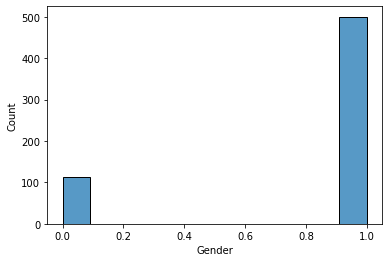

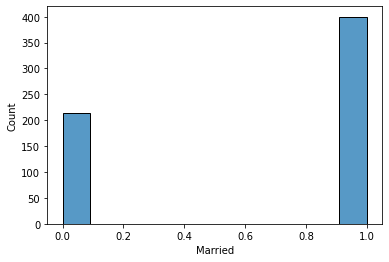

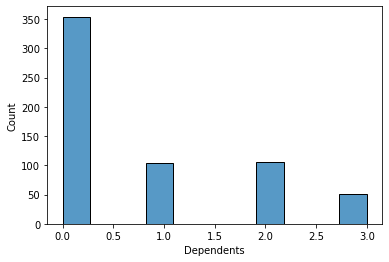

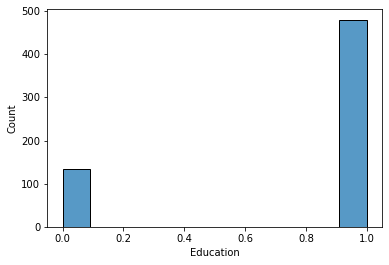

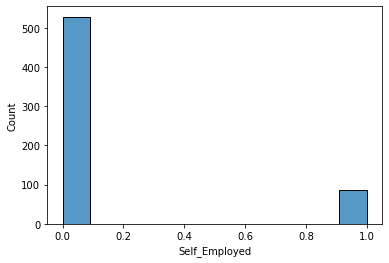

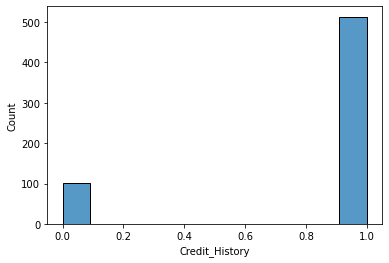

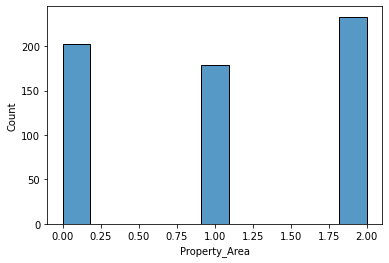

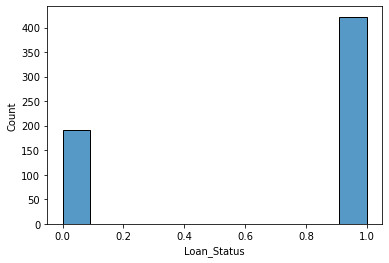

In [22]:
for col in numeric_column:
    sns.histplot(df_train[col])
    plt.show()
      

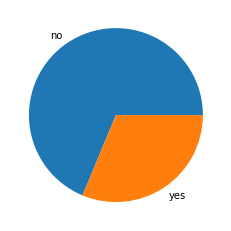

In [23]:
x = df['Loan_Status'].value_counts()
plt.pie(x,labels=['no','yes']);

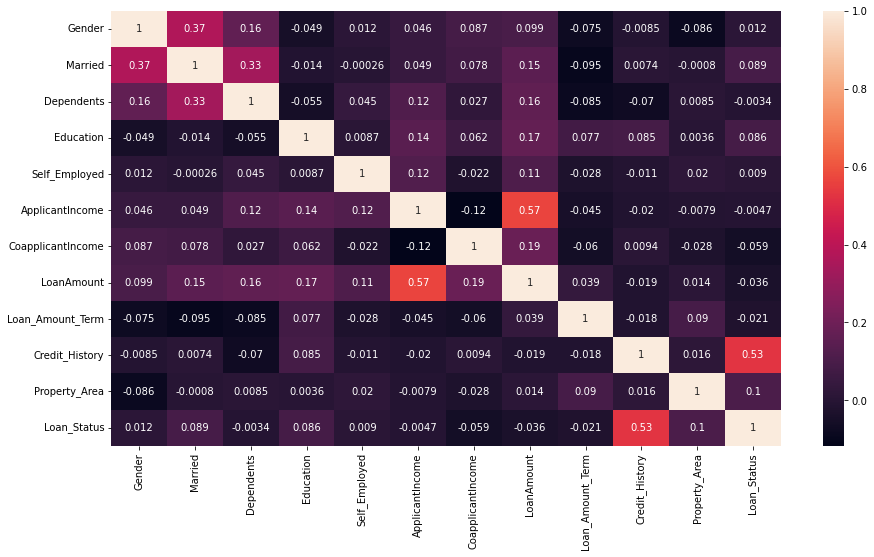

In [24]:
plt.figure(figsize=[15,8])
sns.heatmap(df_train.corr(),annot=True);

In [25]:
# Loan_ID
X = df_train.drop('Loan_ID', axis=1)

In [26]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [27]:
X.fillna( method ='ffill', inplace = True)

In [28]:
X = pd.get_dummies(X , drop_first = True)
X 

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,0,0,0,1
1,1.0,1,1,1,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1
3,1.0,1,1,0,0,0,1,0,0,1
4,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0
610,1.0,1,1,0,0,1,0,0,0,0
611,1.0,1,1,1,0,0,0,0,0,1
612,1.0,1,1,0,1,0,0,0,0,1


In [29]:
X

,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,0,0,0,0,0,0,0,1
1,1.0,1,1,1,0,0,0,0,0,0
2,1.0,1,1,0,0,0,0,1,0,1
3,1.0,1,1,0,0,0,1,0,0,1
4,1.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
609,1.0,0,0,0,0,0,0,0,0,0
610,1.0,1,1,0,0,1,0,0,0,0
611,1.0,1,1,1,0,0,0,0,0,1
612,1.0,1,1,0,1,0,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, y , test_size = 0.25 , random_state = 42, stratify=y)

In [31]:
y_test.value_counts()

Y    106
N     48
Name: Loan_Status, dtype: int64

In [32]:
y_train.value_counts()

Y    316
N    144
Name: Loan_Status, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
x_train_scaled

array([[ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872, -0.69560834],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
         1.26446434, -0.69560834],
       ...,
       [ 0.4307749 ,  0.47265659,  0.73379939, ...,  2.46514159,
         1.26446434, -0.69560834],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058],
       [ 0.4307749 ,  0.47265659,  0.73379939, ..., -0.40565621,
        -0.79084872,  1.43759058]])

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_scaled,y_train)
y_pred = lr.predict(x_test_scaled)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       0.93      0.56      0.70        48
           Y       0.83      0.98      0.90       106

    accuracy                           0.85       154
   macro avg       0.88      0.77      0.80       154
weighted avg       0.86      0.85      0.84       154



In [37]:
from sklearn.svm import SVC
classifier=SVC(kernel="rbf")
classifier.fit(x_train_scaled,y_train)

SVC()

In [38]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test_scaled)
accuracy_score(y_test, y_pred)

0.8506493506493507

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled,y_train)
y_pred = rf.predict(x_test_scaled)
print('evaluation on training', rf.score(x_train_scaled,y_train))
print('evaluation on testing', rf.score(x_test_scaled,y_test))

evaluation on training 0.8326086956521739
evaluation on testing 0.8246753246753247


In [40]:
## KNN regressor 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_test_scaled)
print('evaluation on training', knn.score(x_train_scaled,y_train))
print('evaluation on testing', knn.score(x_test_scaled,y_test))

evaluation on training 0.8
evaluation on testing 0.8181818181818182
